In [1]:
from preprocess import Preprocess
import utils
import parameters as PRM
import torch
from torch import nn

# Links
* https://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html
* https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html

# Load fasttext embeddings
* This cell shows how to load fasttext embeddings.
* We set the PRM.MAX_NB_VECTOR parameter to 10 which means that we load only the first 10 words of the embedding.

In [2]:
p = Preprocess()
PRM.MAX_NB_VECTOR = 10 # size of the embeddings's voccabulary
p.load_fasttext()

* We print the dictionary containing the english vocabuary and the vocab objects and we see that the vocabulary's size is 10.
* We see that the word ',' is at index 0, it is the first word of the vocabulary.
* We print the vector which represent the word ','.
* We print all the vectors of the vocabulary.

In [44]:
print(p.EN_vec.vocab)
print()
print(p.EN_vec.vocab[','])
print()
print(p.EN_vec[','])
print()
print(p.EN_vec.vectors)

{',': <gensim.models.keyedvectors.Vocab object at 0x0000020704172828>, 'the': <gensim.models.keyedvectors.Vocab object at 0x0000020704173198>, '.': <gensim.models.keyedvectors.Vocab object at 0x0000020704172898>, 'and': <gensim.models.keyedvectors.Vocab object at 0x00000207041734A8>, 'to': <gensim.models.keyedvectors.Vocab object at 0x00000207041728D0>, 'of': <gensim.models.keyedvectors.Vocab object at 0x0000020704173240>, 'a': <gensim.models.keyedvectors.Vocab object at 0x000002070416E048>, '</s>': <gensim.models.keyedvectors.Vocab object at 0x0000020704173BE0>, 'in': <gensim.models.keyedvectors.Vocab object at 0x000002070416E0B8>, 'is': <gensim.models.keyedvectors.Vocab object at 0x0000020704173B70>}

Vocab(count:10, index:0)

[ 1.2500e-01 -1.0790e-01  2.4500e-02 -2.5290e-01  1.0570e-01 -1.8400e-02
  1.1770e-01 -7.0100e-02 -4.0100e-02 -8.0000e-03  7.7200e-02 -2.2600e-02
  8.9300e-02 -4.8700e-02 -8.9700e-02 -8.3500e-02  2.0000e-02  2.7300e-02
 -1.9400e-02  9.6400e-02  8.7500e-02  9.80

* We have to define default dimensions for our tensors. We will have to consider a maximum length for our sentences,
trim the longest one and pad the shorter one.

TODO update the max size if needed
* This is an histogram of the sentences lengths in our dataset. From these histograms and the size of the dataset, the
apparent mode of the distribution has been selected as the maximum lengths (15).

array([[<AxesSubplot:title={'center':'source_sentence'}>,
        <AxesSubplot:title={'center':'target_sentence'}>]], dtype=object)

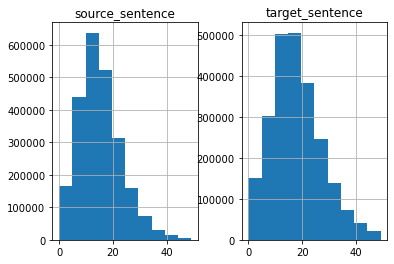

In [10]:
# # Small utility cell to display the distribution of sentences lengths
# p.load_wiki(nb_pair_sentences=None)
# count_word = lambda x : len(utils.sentence2tokens(x))
# sentences_nb_words = p.sentences.applymap(count_word)
# sentences_nb_words = sentences_nb_words.loc[(sentences_nb_words<50).all(1)]
# sentences_nb_words.hist(bins=10)

* We convert the english vectors into a torch tensor which is call weights.
* We create an embedding layer from the weights.

In [58]:
weights = torch.FloatTensor(p.EN_vec.vectors)
print(weights)
emb = nn.Embedding.from_pretrained(weights)
print()
print(emb)
print()
print(emb(torch.LongTensor([1])))

tensor([[ 1.2500e-01, -1.0790e-01,  2.4500e-02,  ...,  2.3050e-01,
         -6.9600e-02, -2.1500e-02],
        [-5.1700e-02,  7.4000e-02, -1.3100e-02,  ...,  2.3700e-01,
          4.0000e-04, -4.2000e-03],
        [ 3.4200e-02, -8.0100e-02,  1.1620e-01,  ...,  5.4230e-01,
         -6.2400e-02,  9.0000e-02],
        ...,
        [ 7.3100e-02, -2.4300e-01, -3.5300e-02,  ...,  4.0930e-01,
         -9.3200e-02, -4.6100e-02],
        [-1.4000e-02, -2.5220e-01,  7.1500e-02,  ...,  1.3700e-01,
          4.5000e-03,  3.2900e-02],
        [-9.7800e-02, -2.0830e-01, -1.0370e-01,  ..., -2.2820e-01,
         -2.2440e-01,  8.9000e-02]])

Embedding(10, 300)

tensor([[-5.1700e-02,  7.4000e-02, -1.3100e-02,  4.4700e-02, -3.4300e-02,
          2.1200e-02,  6.9000e-03, -1.6300e-02, -1.8100e-02, -2.0000e-03,
         -1.0210e-01,  5.9000e-03,  2.5700e-02, -2.6000e-03, -5.8600e-02,
         -3.7800e-02,  1.6300e-02,  1.4600e-02, -8.8000e-03, -1.7600e-02,
         -8.5000e-03, -7.8000e-03, -1.8300e-02,  8.